In [1]:
import os
from pathlib import Path
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

In [2]:
parent = os.path.join(Path(os.getcwd()).parent)

print(parent)

sys.path.append(parent)

c:\Users\bruij_kn\OneDrive - Stichting Deltares\Documents\GitHub\thermo-morphological-model


In [3]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
# reference variables
per1 = {
    "start_time": pd.to_datetime("2009-08-02"), # these dates are relevant for the bluff edge only
    "end_time": pd.to_datetime("2011-07-15"),
    "x_shore_line_start": -1,   # i.e., distance to baseline at start
    "x_bluff_edge_start": 162.01508156899843,   # i.e., distance to baseline at start
    "x_shore_line_end": -1,   # i.e., distance to baseline at end
    "x_bluff_edge_end": 162.4068294126812,   # i.e., distance to baseline at end
}

per2 = {
    "start_time": pd.to_datetime("2012-07-11"), # these dates are relevant for the bluff edge only
    "end_time": pd.to_datetime("2015-07-05"),
    "x_shore_line_start": -1,   # i.e., distance to baseline at start
    "x_bluff_edge_start": 164.52084174135774,   # i.e., distance to baseline at start
    "x_shore_line_end": -1,   # i.e., distance to baseline at end
    "x_bluff_edge_end": 179.48248124206415,   # i.e., distance to baseline at end
}

per3 = {
    "start_time": pd.to_datetime("2016-08-27"), # these dates are relevant for the bluff edge only
    "end_time": pd.to_datetime("2018-07-30"),
    "x_shore_line_start": -1,   # i.e., distance to baseline at start
    "x_bluff_edge_start": 187.25161246050337,   # i.e., distance to baseline at start
    "x_shore_line_end": -1,   # i.e., distance to baseline at end
    "x_bluff_edge_end": 195.1759190877606,   # i.e., distance to baseline at end
}

In [5]:
# fnames = os.listdir('./erosion_rates/')

per = int(1)

fnames = [f'val_per{per}_{i}.csv' for i in np.arange(2, 8)]
run_ids = [f'{fname[:-4]}' for fname in fnames]

print(fnames)
print(run_ids)

['val_per1_2.csv', 'val_per1_3.csv', 'val_per1_4.csv', 'val_per1_5.csv', 'val_per1_6.csv', 'val_per1_7.csv']
['val_per1_2', 'val_per1_3', 'val_per1_4', 'val_per1_5', 'val_per1_6', 'val_per1_7']


In [6]:
total_erosion = dict(dtype=object)

all_run_ids = []
all_erosion_bluff_edge = []
all_erosion_shore_line = []

all_erosion_bluff_edge_data = []

for fname in fnames:
    
    df = pd.read_csv(Path(f'./erosion_rates/{fname}'), parse_dates=['time'])
        
    run_id = fname[:-4]
    
    # get relevant period information
    if 'per1' in run_id:
        per = per1
    elif 'per2' in run_id:
        per = per2
    elif 'per3' in run_id:
        per = per3
    
    start_time = per['start_time']
    end_time = per['end_time']
    
    df_start = df[df['time']==start_time]
    df_end = df[df['time']==end_time]
        
    x_shore_line_start = df_start['x_shore_line'].values[0]
    x_shore_line_end = df_end['x_shore_line'].values[0]
    
    x_bluff_edge_start = df_start['x_bluff_edge'].values[0]
    x_bluff_edge_end = df_end['x_bluff_edge'].values[0]
    
    total_erosion_shore_line = x_shore_line_end - x_shore_line_start
    total_erosion_bluff_edge = x_bluff_edge_end - x_bluff_edge_start
    
    total_erosion[run_id] = {"total_erosion_shore_line": total_erosion_shore_line, 
                             "total_erosion_bluff_edge": total_erosion_bluff_edge}
    
    all_run_ids.append(run_id)
    all_erosion_bluff_edge.append(total_erosion_bluff_edge)
    all_erosion_shore_line.append(total_erosion_shore_line)
    
    all_erosion_bluff_edge_data.append(per['x_bluff_edge_end'] - per['x_bluff_edge_start'])
    
    print(f'completed run {run_id}')

completed run val_per1_2
completed run val_per1_3
completed run val_per1_4
completed run val_per1_5
completed run val_per1_6
completed run val_per1_7


In [7]:
print(fnames)
print(all_erosion_bluff_edge)

['val_per1_2.csv', 'val_per1_3.csv', 'val_per1_4.csv', 'val_per1_5.csv', 'val_per1_6.csv', 'val_per1_7.csv']
[np.float64(10.0), np.float64(8.0), np.float64(6.0), np.float64(8.0), np.float64(8.0), np.float64(8.0)]


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_2776\1556758375.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


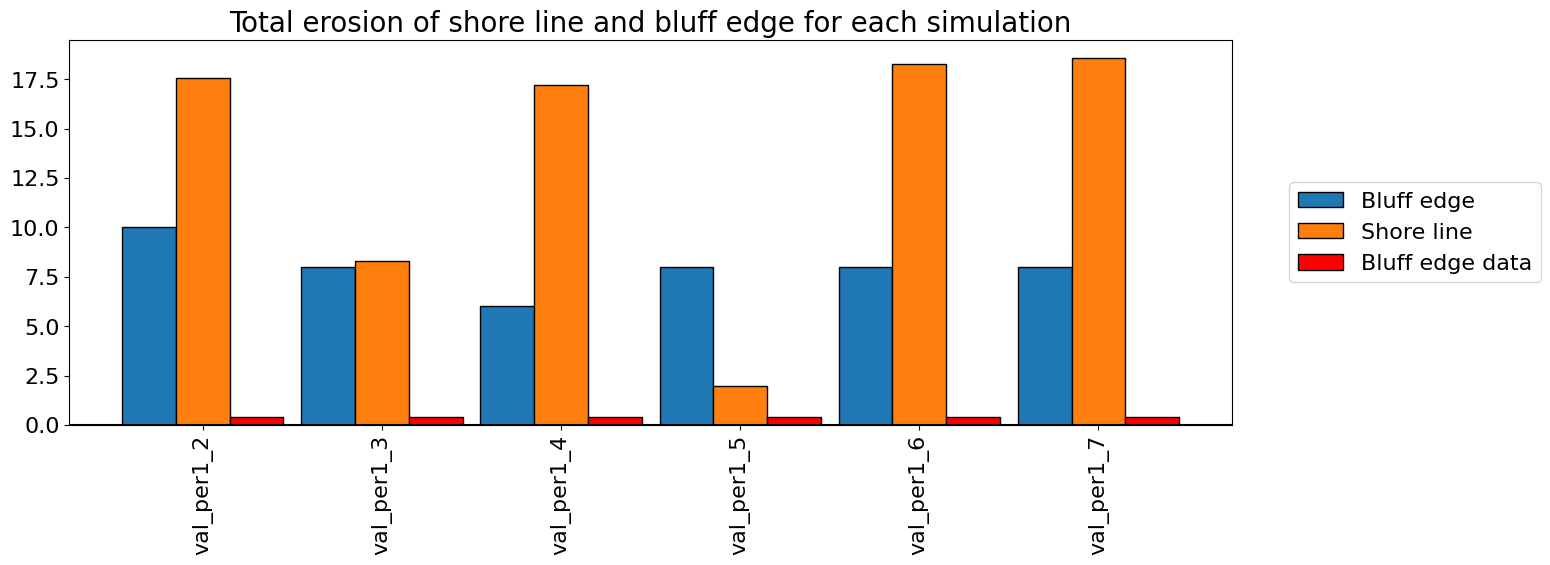

In [8]:
fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(np.arange(len(fnames)) - 0.3, width=0.3, height=all_erosion_bluff_edge, label='Bluff edge', fc='C0', ec='k')
ax.bar(np.arange(len(fnames)) + 0.0, width=0.3, height=all_erosion_shore_line, label='Shore line', fc='C1', ec='k')
ax.bar(np.arange(len(fnames)) + 0.3, width=0.3, height=all_erosion_bluff_edge_data, label='Bluff edge data', fc='r', ec='k')

ax.axhline(0, color='k')

ax.set_xticks(np.arange(len(fnames)), all_run_ids)
ax.set_xticklabels(all_run_ids, rotation=90)

ax.set_title("Total erosion of shore line and bluff edge for each simulation")

ax.legend(bbox_to_anchor=(1.04, 0.5), loc="center left")

fig.show()

So that's total erosion. What about w.r.t. the erosion line?

In [9]:
# first load data
df_be = gpd.read_file(os.path.join(parent, Path("database/ts_datasets/bluff_edges.csv")))
sort_mask = np.argsort(df_be.time.values)
df_be = df_be.iloc[sort_mask]

df_be['time'] = pd.to_datetime(df_be.time.values)
df_be['distance_from_ref'] = np.float32(df_be['distance_from_ref'].values)

df_sl = gpd.read_file(os.path.join(parent, Path("database/ts_datasets/shore_lines.csv")))
sort_mask = np.argsort(df_sl.time.values)
df_sl = df_sl.iloc[sort_mask]

df_sl['time'] = pd.to_datetime(df_sl.time.values)
df_sl['distance_from_ref'] = np.float32(df_sl['distance_from_ref'].values)


df_be.head()

,field_1,time,distance_from_ref,transect_id,ref_point,geometry
3,3,1950-08-02,43.059185,134.0,0 POINT (399293.416 7783163.429)\ndtype: ge...,POINT (-143.65624731604254 70.13496685853804)
2,2,1955-07-24,55.670830,134.0,0 POINT (399293.416 7783163.429)\ndtype: ge...,POINT (-143.65624832870435 70.13485378355169)
4,4,1969-07-25,84.629684,134.0,0 POINT (399293.416 7783163.429)\ndtype: ge...,POINT (-143.656250653975 70.13459414082698)
11,11,1975-07-07,93.130219,134.0,0 POINT (399293.416 7783163.429)\ndtype: ge...,POINT (-143.65625133653052 70.13451792571242)
6,6,1979-07-13,93.873360,134.0,0 POINT (399293.416 7783163.429)\ndtype: ge...,POINT (-143.65625139620138 70.13451126277761)


first only look at val_per1_2.

In [12]:
df = pd.read_csv("erosion_rates/val_per1_2.csv")

df.head()

,Unnamed: 0,time,x_shore_line,x_bluff_edge,relative_erosion_bluff_edge,relative_x_bluff_edge,relative_erosion_shore_line,relative_x_shore_line
0,0,2009-01-01 00:00:00,1345.161654,1370.214286,-4.0,158.015082,-29.052632,132.96245
1,1,2009-01-01 12:00:00,1345.161654,1370.214286,-4.0,158.015082,-29.052632,132.96245
2,2,2009-01-02 00:00:00,1345.161654,1370.214286,-4.0,158.015082,-29.052632,132.96245
3,3,2009-01-02 12:00:00,1345.161654,1370.214286,-4.0,158.015082,-29.052632,132.96245
4,4,2009-01-03 00:00:00,1345.161654,1370.214286,-4.0,158.015082,-29.052632,132.96245


C:\Users\bruij_kn\AppData\Local\Temp\ipykernel_2776\264072824.py:55: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


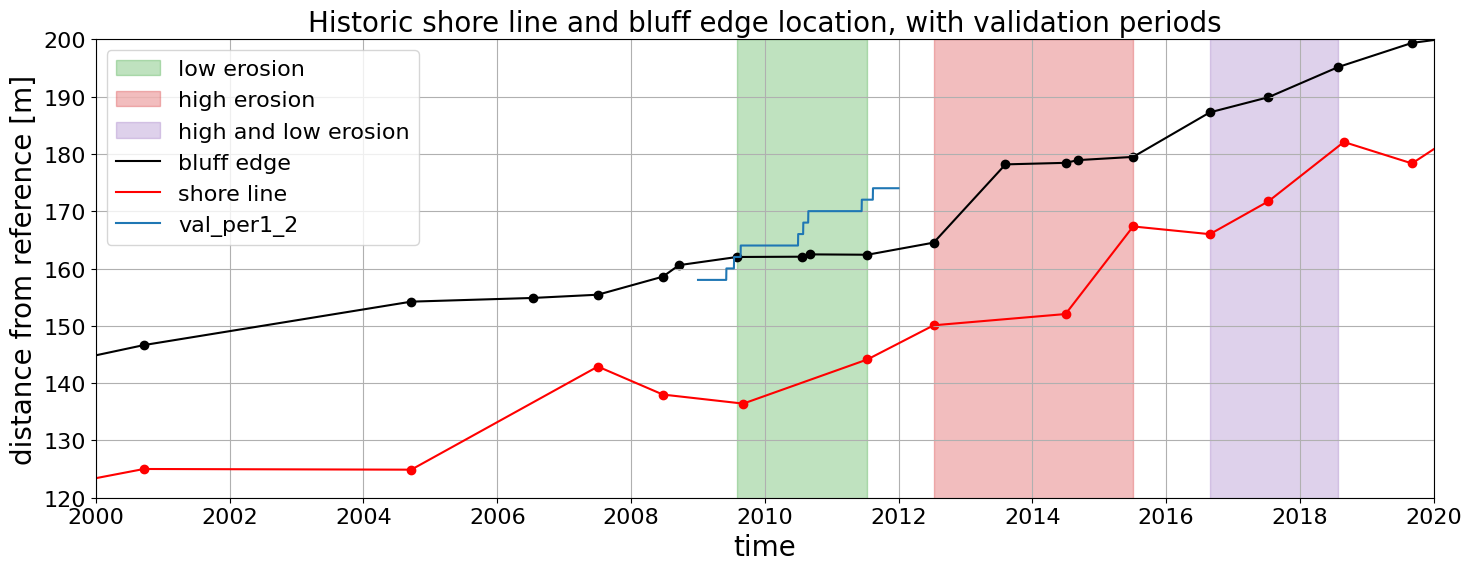

In [21]:
# create figure
fig, ax = plt.subplots(figsize=(15,6))

# fill masks
ax.fill_between([pd.Timestamp('2009-08-02'), pd.Timestamp('2011-07-15')], 0, 200, alpha=0.3, label='low erosion', color='C2')
ax.fill_between([pd.Timestamp('2012-07-11'), pd.Timestamp('2015-07-05')], 0, 200, alpha=0.3, label='high erosion', color='C3')
ax.fill_between([pd.Timestamp('2016-08-27'), pd.Timestamp('2018-07-30')], 0, 200, alpha=0.3, label='high and low erosion', color='C4')

# plot lines
ax.plot(df_be.time.values, df_be.distance_from_ref.values, label='bluff edge', color='k')
ax.plot(df_sl.time.values, df_sl.distance_from_ref.values, label='shore line', color='r')

# plot data points
ax.scatter(df_be.time.values, df_be.distance_from_ref.values, color='k')
ax.scatter(df_sl.time.values, df_sl.distance_from_ref.values, color='r')

#######################################################################################3

per = int(1)

fnames = [f'val_per{per}_{i}.csv' for i in np.arange(2, 3)]

run_ids = [f'{fname[:-4]}' for fname in fnames]

i = 0

# plot modelled points
for fname in fnames:
    
    df = pd.read_csv(Path(f'./erosion_rates/{fname}'), parse_dates=['time'])
        
    run_id = fname[:-4]
    
    ax.plot(df['time'], df['relative_x_bluff_edge'], color=f'C{i}', label=run_id)
    
    i+= 1
    
#######################################################################################3

# make figure look nice
ax.set_xlim((pd.Timestamp('2000-01-01'), pd.Timestamp('2020-01-01')))
ax.set_ylim((120, 200))

ax.grid()

ax.set_xlabel('time')
ax.set_ylabel('distance from reference [m]')

ax.set_title('Historic shore line and bluff edge location, with validation periods')

ax.legend(loc='upper left')

fig.tight_layout()

fig.show()